<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-100/blob/main/Hepatitis_C_Medical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports:-**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
from sklearn.preprocessing import LabelBinarizer
pd.plotting.register_matplotlib_converters()
import seaborn as sns 
%matplotlib inline
sns.set()
print('Setup completed!!')

Setup completed!!


**Read the DataFrame:**

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/HepatitisCdata.csv')
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


**Check the DataFrame DataTypes:**

In [3]:
data.dtypes

Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
dtype: object

**MakeSure if we Have MissingValues:-**

In [4]:
data.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

**Dealing With MissingValues:-**
In this case we will fill all our missing values with Zeros, using the fillna() method.

In [5]:
data.fillna(0, axis=0, inplace=True)

**Get General Discription for numaric features:-**

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,615.0,308.000000,177.679487,1.00,154.500,308.00,461.500,615.00
Age,615.0,47.408130,10.055105,19.00,39.000,47.00,54.000,77.00
ALB,615.0,41.552520,6.014807,0.00,38.800,41.90,45.200,82.20
ALP,615.0,66.285366,28.112329,0.00,51.700,65.30,79.300,416.60
ALT,615.0,28.404553,25.474786,0.00,16.400,23.00,33.050,325.30
AST,615.0,34.786341,33.090690,10.60,21.600,25.90,32.900,324.00
BIL,615.0,11.396748,19.673150,0.80,5.300,7.30,11.200,254.00
CHE,615.0,8.196634,2.205657,1.42,6.935,8.26,9.590,16.41
CHOL,615.0,5.280813,1.312962,0.00,4.580,5.29,6.055,9.67
CREA,615.0,81.287805,49.756166,8.00,67.000,77.00,88.000,1079.10


**Dropout Unwanted Columns:**

In [7]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

**Get General Discription for the Categorical Features:-**

In [8]:
data.describe(include='object')

,Category,Sex
count,615,615
unique,5,2
top,0=Blood Donor,m
freq,533,377


# **Data Visualiztion**

**BarCharts(Count plots):**

(array([  0., 100., 200., 300., 400., 500., 600.]),
 <a list of 7 Text major ticklabel objects>)

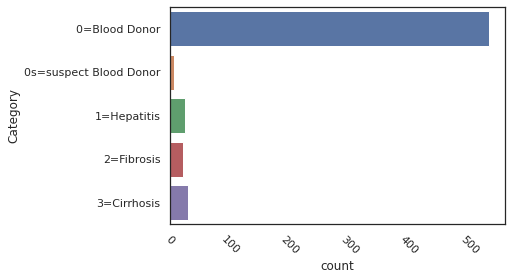

In [9]:
# Count Plot (a.k.a. Bar Plot)
sns.set_style('white')
sns.countplot(y='Category', data=data)
 
# Rotate x-labels
plt.xticks(rotation=-45)

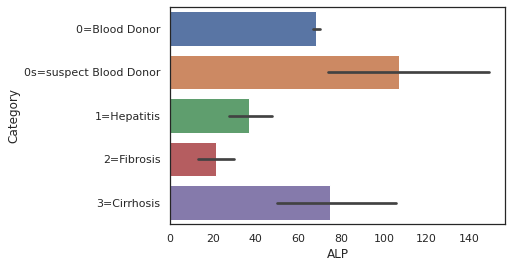

In [10]:
sns.barplot(x=data['ALP'], y=data['Category'])

# Distributions Plots:-

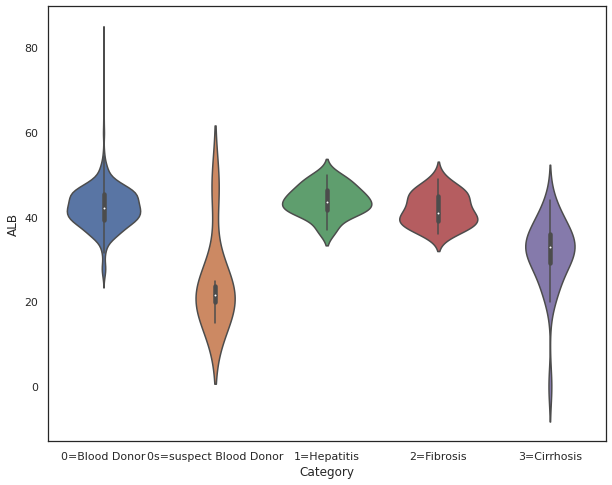

In [11]:
plt.figure(figsize=(10, 8))
sns.set_style('white')
sns.violinplot(x=data['Category'], y=data['ALB'])

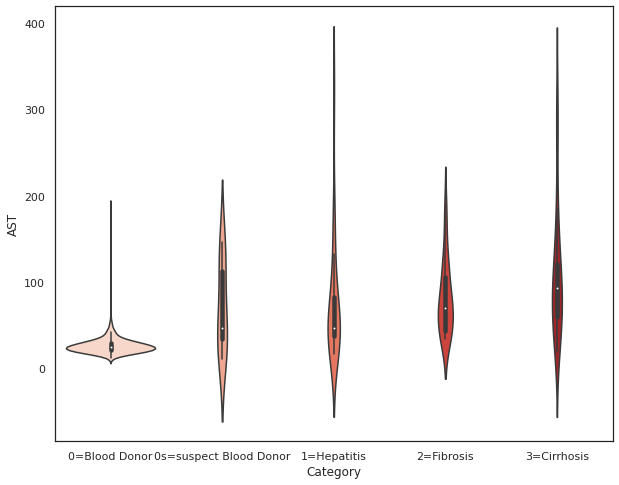

In [12]:
# Create violinplot: 
plt.figure(figsize=(10, 8))
sns.set_style('white')
sns.violinplot(x=data['Category'], y=data['AST'],palette='Reds')

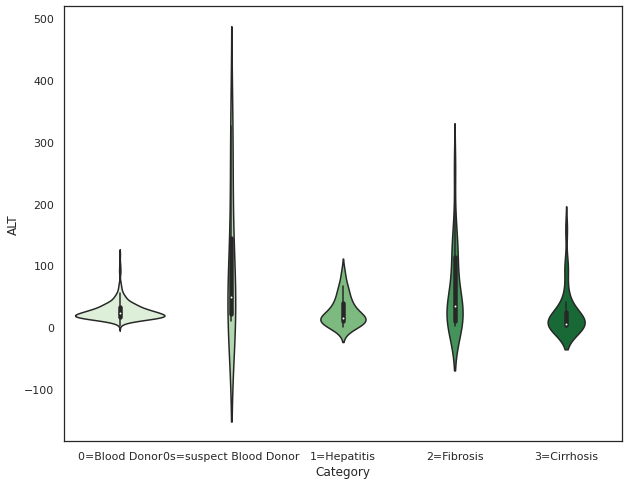

In [13]:
# Create violinplot: 
plt.figure(figsize=(10, 8))
sns.set_style('white')
sns.violinplot(x=data['Category'], y=data['ALT'],palette='Greens')

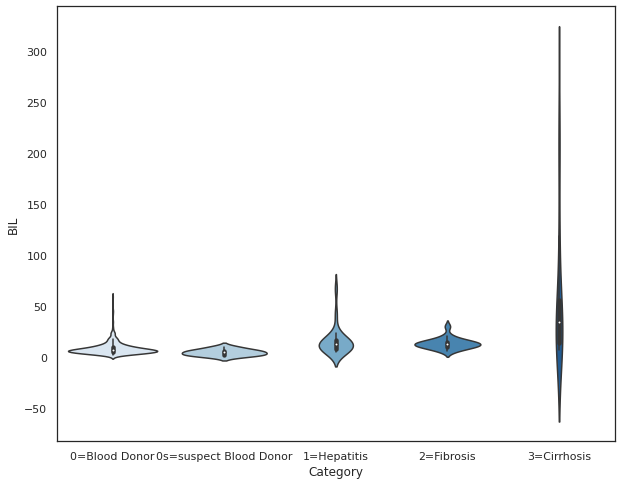

In [14]:
plt.figure(figsize=(10,8))
sns.set_style('white')
sns.violinplot(x=data['Category'], y=data['BIL'],palette='Blues')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


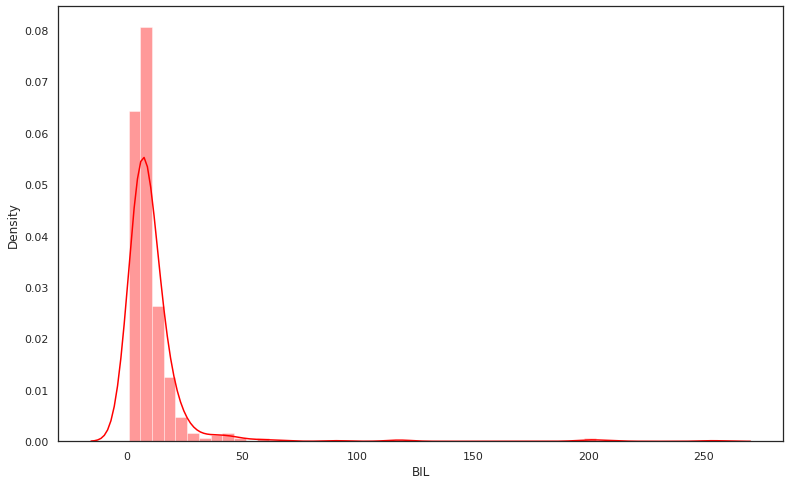

In [15]:
# Create a histogram: 
# Change the style of the figure to the "white" theme
sns.set_style("white")
plt.figure(figsize=(13, 8))
sns.distplot(a=data['BIL'],color='Red', kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


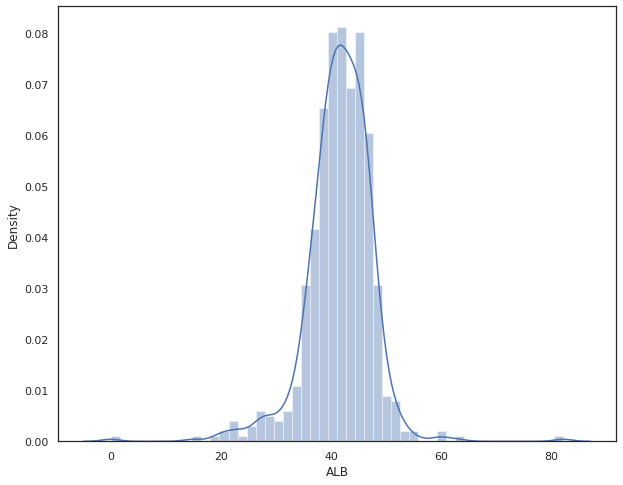

In [16]:
sns.set_style('white')
plt.figure(figsize=(10, 8))
sns.distplot(a= data['ALB'], kde=True)

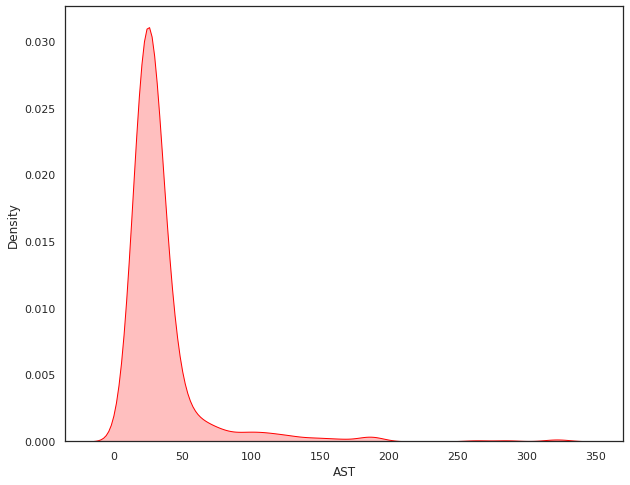

In [17]:
sns.set_style('white')
plt.figure(figsize=(10, 8))
sns.kdeplot(data=data['AST'], shade=True, color='Red')

<Figure size 1440x720 with 0 Axes>

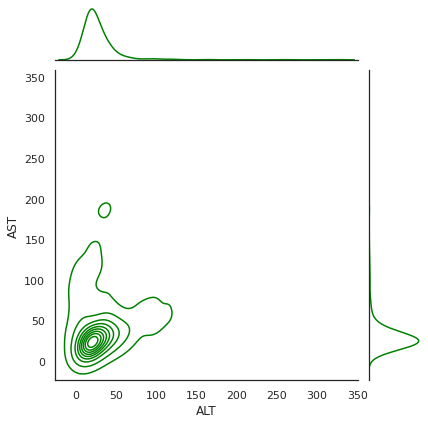

In [18]:
# 2D KDE plots:
sns.set_style('white')
plt.figure(figsize=(20, 10))
sns.jointplot(x=data['ALT'], y=data['AST'], kind='kde', color='green')

<Figure size 1440x720 with 0 Axes>

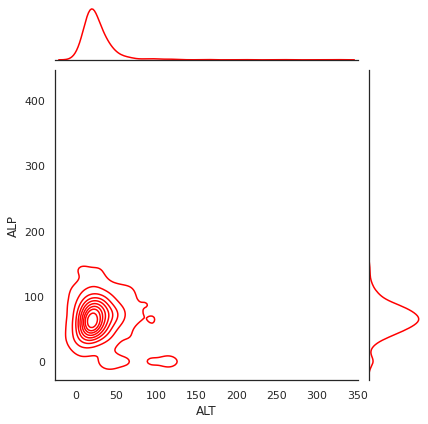

In [19]:
sns.set_style('white')
plt.figure(figsize=(20, 10))
sns.jointplot(x=data['ALT'], y=data['ALP'], kind='kde', color='Red')

# Relationships & Correlation Plots:-

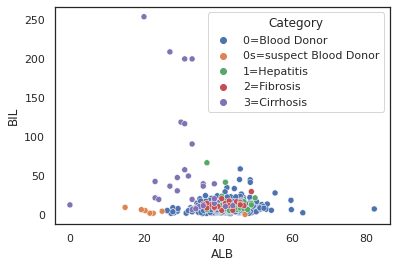

In [20]:
# Scatterplots: 
sns.scatterplot(x=data['ALB'], y=data['BIL'], hue=data['Category'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 78.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


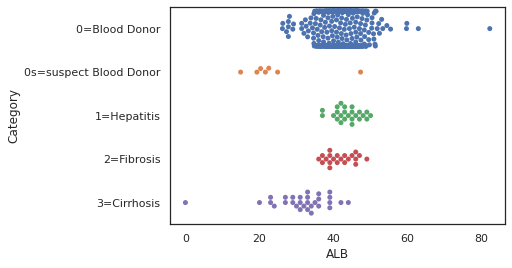

In [21]:
# Scatter for Categoriacal Values: 
sns.swarmplot(x=data['ALB'], y=data['Category'])

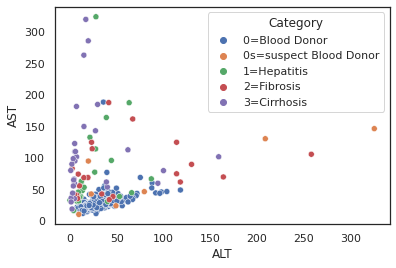

In [22]:
sns.scatterplot(x=data['ALT'], y=data['AST'], hue=data['Category'])

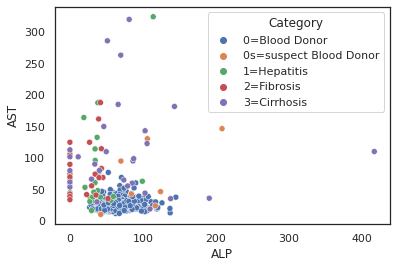

In [23]:
sns.scatterplot(x=data['ALP'], y=data['AST'], hue=data['Category'])

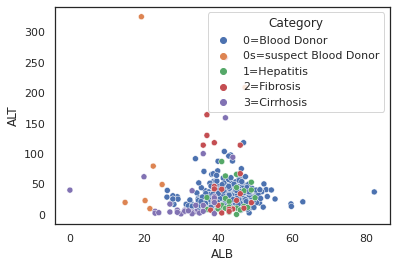

In [24]:
sns.scatterplot(x=data['ALB'], y=data['ALT'], hue=data['Category'])

<Figure size 864x720 with 0 Axes>

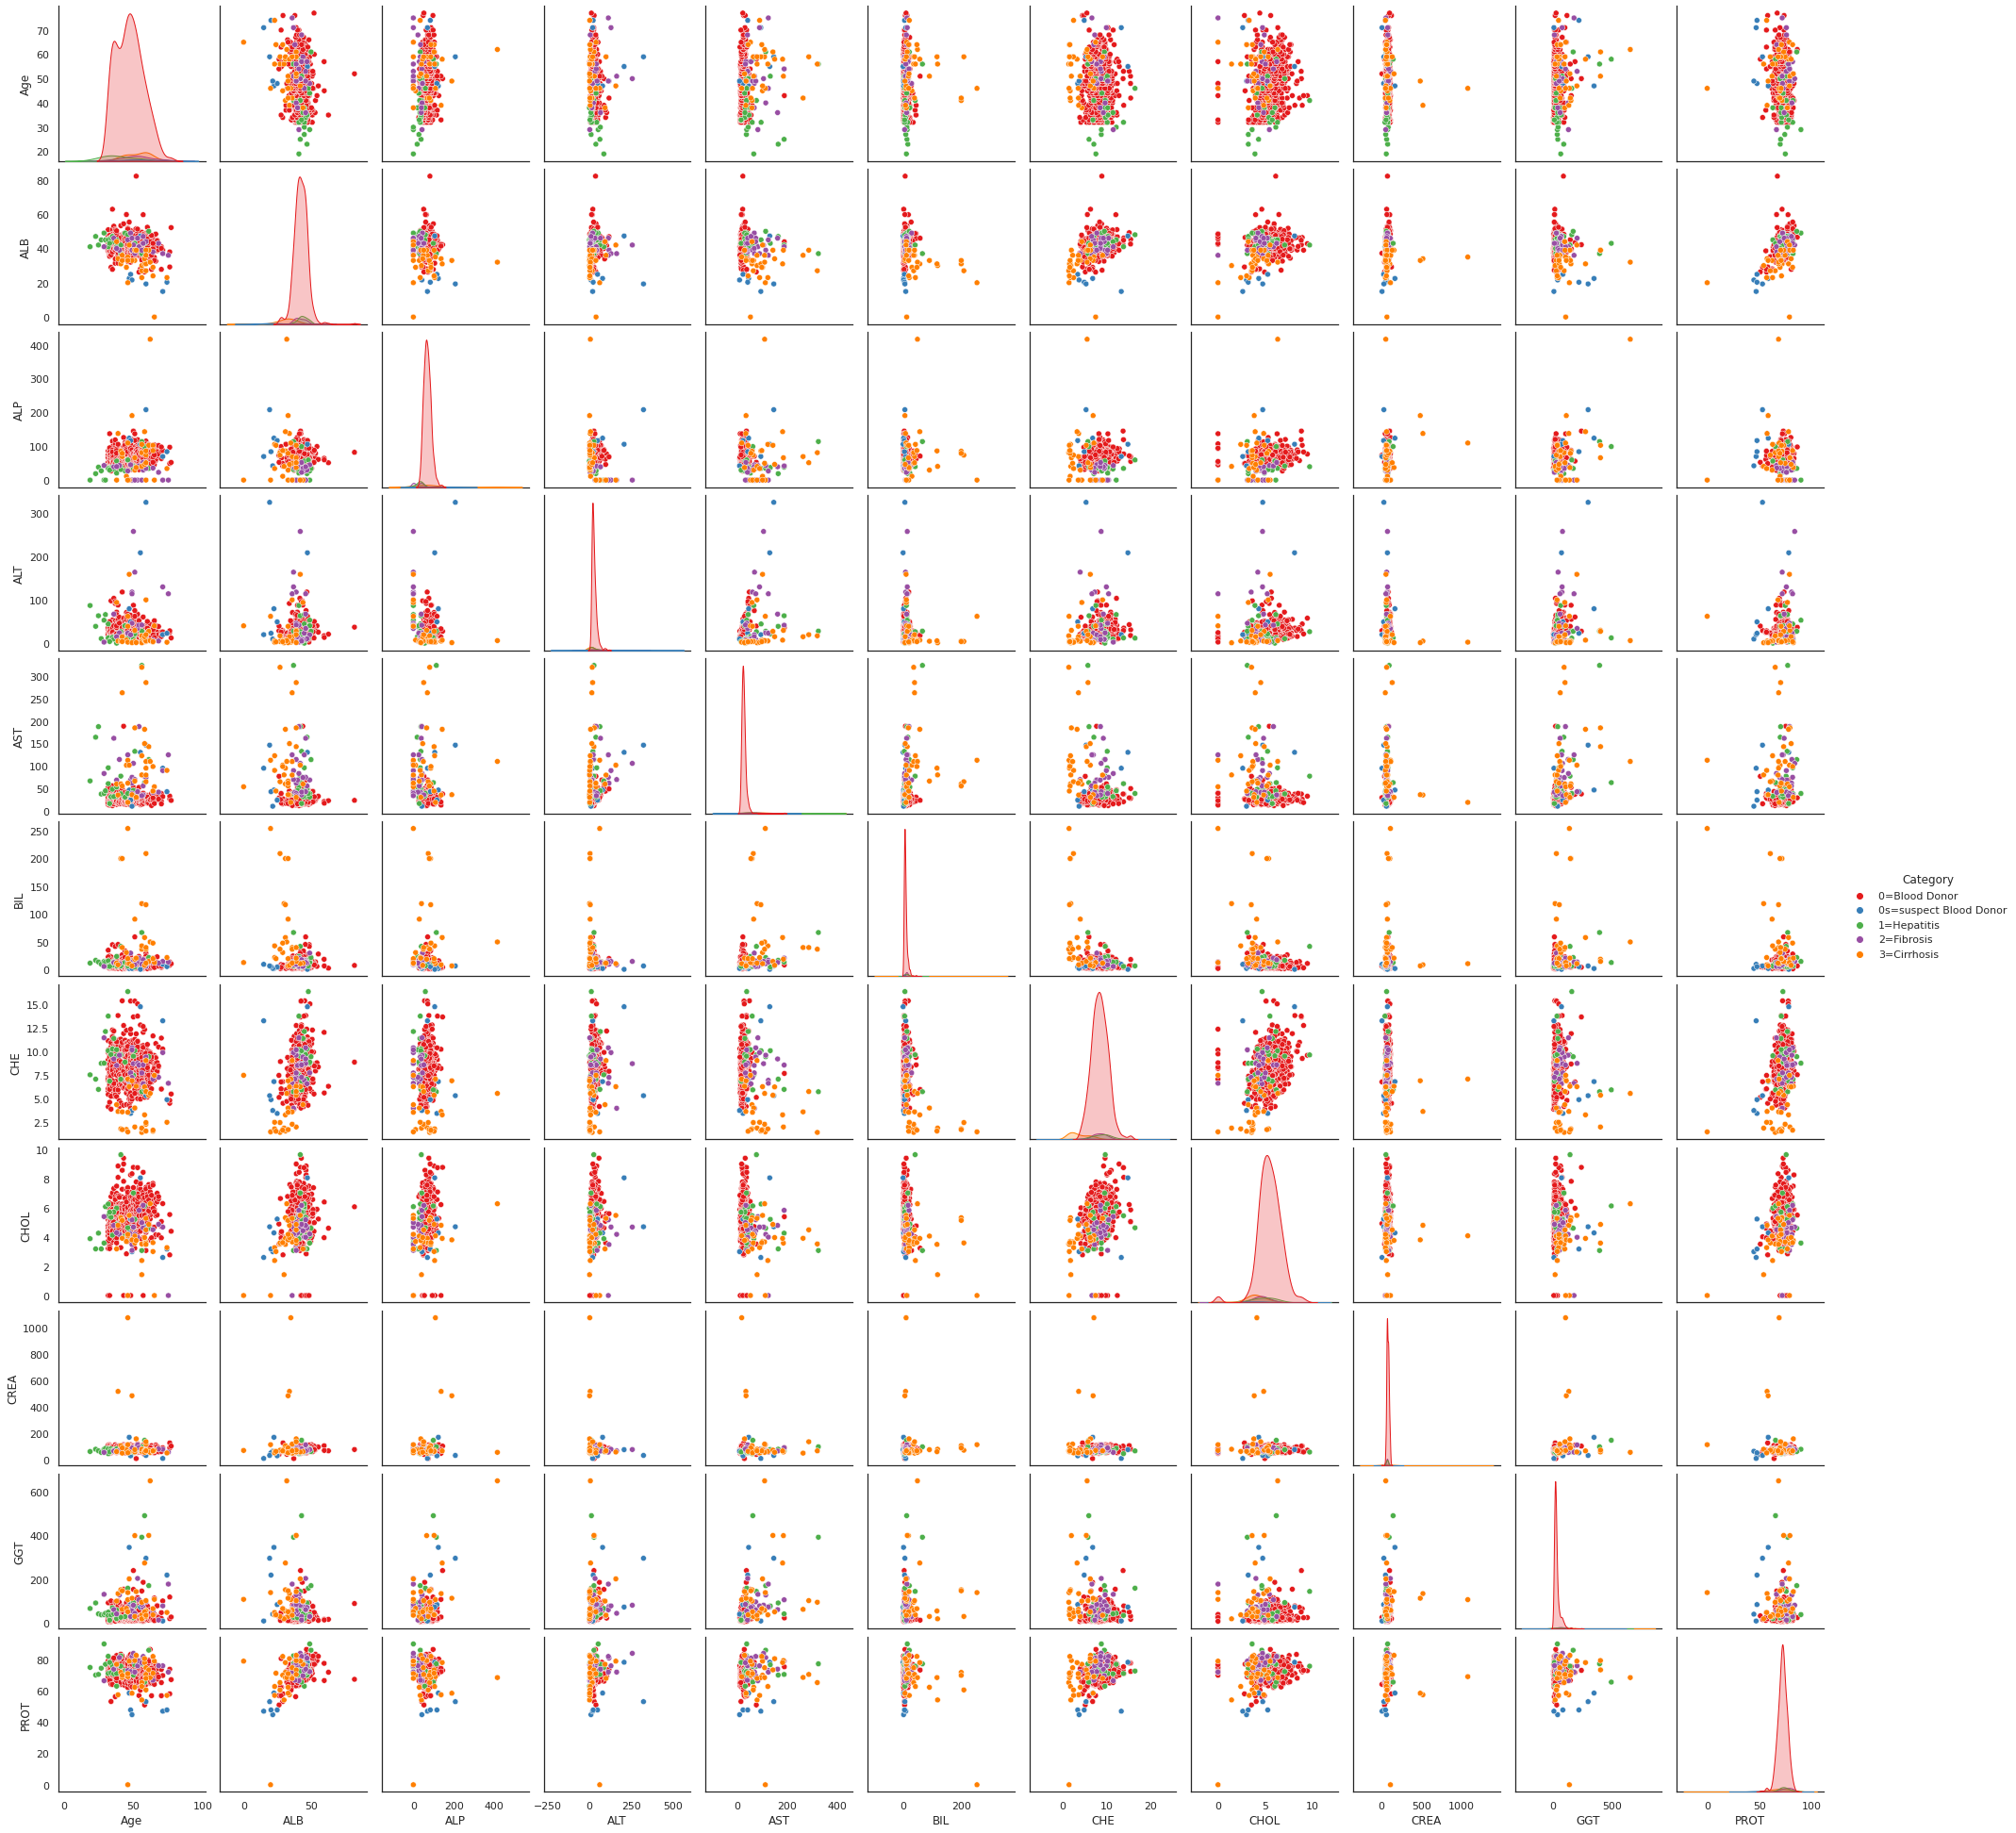

In [25]:
# Pairplot: 
plt.figure(figsize=(12, 10))
sns.pairplot(data, kind='scatter', hue='Category', palette='Set1')
plt.show()

# **Data Preprocessing And Feature Scaling:-**

**Starting with Extract the Binary Variables:-**

In [26]:
df_uniques = data.nunique() 
# Count number of distinct elements in specified axis. 
#Return Series with number of distinct elements. Can ignore NaN values.
df_uniques

Category      5
Age          49
Sex           2
ALB         190
ALP         415
ALT         342
AST         297
BIL         188
CHE         407
CHOL        314
CREA        117
GGT         358
PROT        199
dtype: int64

In [27]:
bin_vals = list(df_uniques[df_uniques == 2].index) # Create alist for our bin_vales (composed of at least two values)
bin_vals

['Sex']

In [28]:
categorical_vals  = list(df_uniques[(df_uniques > 2) & (df_uniques <=6)].index)
# This function allow us to determine how many categorical do we have actually those are more than 2 and less than 6
categorical_vals

['Category']

In [29]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

**LabelBinarizer:** for converting bin_values(Yes or NO, True or Flase) into (0 & 1).

**LabelEncoder:** Used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.



In [30]:
lb , le = LabelBinarizer(), LabelEncoder()

In [31]:
for col in categorical_vals: 
    data[col] = le.fit_transform(data[col])

In [32]:
for col in bin_vals: 
    data[col] = lb.fit_transform(data[col])

In [33]:
data.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [34]:
data.tail()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
610,4,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,4,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,4,64,0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,4,46,0,33.0,0.0,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,4,59,0,36.0,0.0,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


# **Feature Scaling:**

In [35]:
X = data
y = data['Category']

In [36]:
X.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [37]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Category, dtype: int64

In [38]:
cols = X.columns


In [39]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)


In [40]:
X = pd.DataFrame(X, columns=[cols])


In [41]:
X.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0.0,0.224138,1.0,0.468370,0.126020,0.023670,0.036694,0.026461,0.367578,0.334023,0.091495,0.011757,0.766667
1,0.0,0.224138,1.0,0.468370,0.168747,0.055334,0.044990,0.012243,0.650434,0.496381,0.061619,0.017172,0.850000
2,0.0,0.224138,1.0,0.570560,0.179309,0.111282,0.134014,0.020932,0.494997,0.537746,0.072822,0.044400,0.881111
3,0.0,0.224138,1.0,0.525547,0.124820,0.094067,0.038290,0.071485,0.394263,0.490176,0.067221,0.045328,0.841111
4,0.0,0.224138,1.0,0.476886,0.177868,0.100215,0.045310,0.034755,0.515677,0.446743,0.063486,0.039295,0.763333


# Get the Relationship between the Varaibales:-

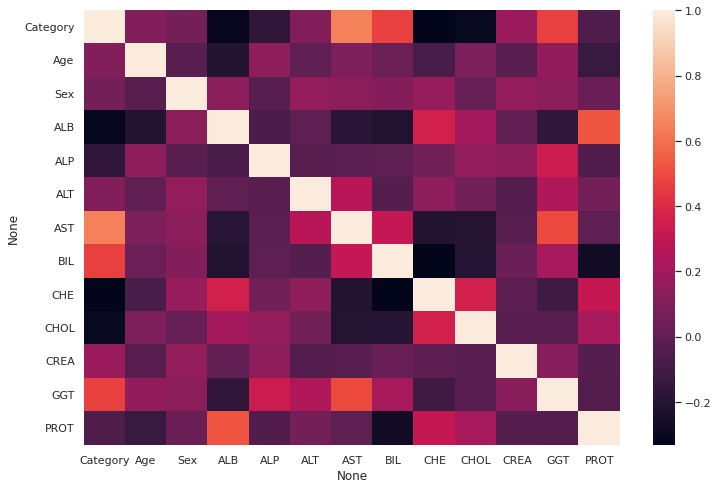

In [42]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(X.corr())

#  Kmeans for Clustering:-

In [43]:
from sklearn.cluster import KMeans
# Kmeans model with k=4: 
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


KMeans(n_clusters=4, random_state=0)

In [44]:
# Get the inertia: 
kmeans.inertia_

68.57281177454288

In [45]:
pred = kmeans.predict(X)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Text(0.5, 1.0, 'Making a clustering when k=4')

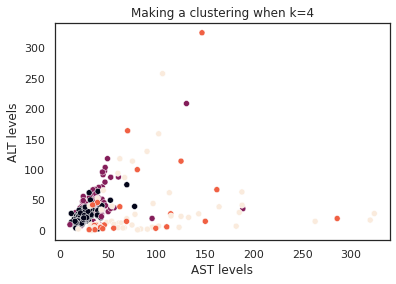

In [46]:
data_with_clusters = data.copy()
data_with_clusters['clusters'] = pred
sns.scatterplot(x=data_with_clusters['AST'], y=data_with_clusters['ALT'],c=data_with_clusters['clusters'])
plt.xlabel('AST levels')
plt.ylabel('ALT levels')
plt.title('Making a clustering when k=4')

# Using elbow mwthod to determine the optimam number of clusters:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.

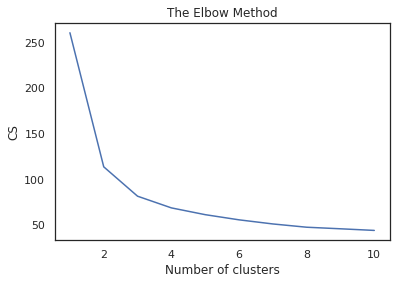

In [47]:
cs = []
for i in range(1, 11):
    K_model = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    K_model.fit(X)
    cs.append(K_model.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [48]:
# from the graph above it seems that the right value of k = 8:
k_means = KMeans(n_clusters=8, random_state=0)
k_means.fit(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


KMeans(random_state=0)

In [49]:
# Get the inertia : 
k_means.inertia_

47.39034927282282

In [50]:
pred_2 = k_means.predict(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


Text(0.5, 1.0, 'Making a clustering when k=8')

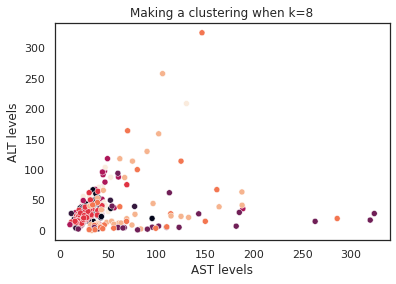

In [51]:
data_with_clusters = data.copy()
data_with_clusters['clusters'] = pred_2
sns.scatterplot(x=data_with_clusters['AST'], y=data_with_clusters['ALT'],c=data_with_clusters['clusters'])
plt.xlabel('AST levels')
plt.ylabel('ALT levels')
plt.title('Making a clustering when k=8')